In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_excel("default of credit card clients.xlsx", header=1) # we use header as we skip first row 
print("Shape:", df.shape)
print("\nColumns:", df.columns.tolist())
print("\nSample Data:\n", df.head())

Shape: (30000, 25)

Columns: ['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'default payment next month']

Sample Data:
    ID  LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_0  PAY_2  PAY_3  PAY_4  \
0   1      20000    2          2         1   24      2      2     -1     -1   
1   2     120000    2          2         2   26     -1      2      0      0   
2   3      90000    2          2         2   34      0      0      0      0   
3   4      50000    2          2         1   37      0      0      0      0   
4   5      50000    1          2         1   57     -1      0     -1      0   

   ...  BILL_AMT4  BILL_AMT5  BILL_AMT6  PAY_AMT1  PAY_AMT2  PAY_AMT3  \
0  ...          0          0          0         0       689         0   
1  ...       3272       3455       3261   

In [3]:
print(" SEX Distribution:\n", df['SEX'].value_counts())
print("EDUCATION Distribution:\n", df['EDUCATION'].value_counts())
print("MARRIAGE Distribution:\n", df['MARRIAGE'].value_counts())

 SEX Distribution:
 SEX
2    18112
1    11888
Name: count, dtype: int64
EDUCATION Distribution:
 EDUCATION
2    14030
1    10585
3     4917
5      280
4      123
6       51
0       14
Name: count, dtype: int64
MARRIAGE Distribution:
 MARRIAGE
2    15964
1    13659
3      323
0       54
Name: count, dtype: int64


In [5]:
print("Null Values Check:\n", df.isnull().sum())
print(" Column Data Types:\n", df.dtypes)

Null Values Check:
 ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default payment next month    0
dtype: int64
 Column Data Types:
 ID                            int64
LIMIT_BAL                     int64
SEX                           int64
EDUCATION                     int64
MA

In [7]:
df['SEX'] = df['SEX'].map({1: 'Male', 2: 'Female'})
df['MARRIAGE'] = df['MARRIAGE'].map({1: 'Married', 2: 'Single', 3: 'Others'})
df['EDUCATION'] = df['EDUCATION'].replace({0: 'Unknown', 5: 'Unknown', 6: 'Unknown'})
df['EDUCATION'] = df['EDUCATION'].map({
    1: 'Graduate School', 2: 'University', 3: 'High School', 4: 'Others', 'Unknown': 'Others'
})
print("\ Updated Dataset Preview:\n", df.head())

\ Updated Dataset Preview:
    ID  LIMIT_BAL     SEX   EDUCATION MARRIAGE  AGE  PAY_0  PAY_2  PAY_3  \
0   1      20000  Female  University  Married   24      2      2     -1   
1   2     120000  Female  University   Single   26     -1      2      0   
2   3      90000  Female  University   Single   34      0      0      0   
3   4      50000  Female  University  Married   37      0      0      0   
4   5      50000    Male  University  Married   57     -1      0     -1   

   PAY_4  ...  BILL_AMT4  BILL_AMT5  BILL_AMT6  PAY_AMT1  PAY_AMT2  PAY_AMT3  \
0     -1  ...          0          0          0         0       689         0   
1      0  ...       3272       3455       3261         0      1000      1000   
2      0  ...      14331      14948      15549      1518      1500      1000   
3      0  ...      28314      28959      29547      2000      2019      1200   
4      0  ...      20940      19146      19131      2000     36681     10000   

   PAY_AMT4  PAY_AMT5  PAY_AMT6  default

<>:7: SyntaxWarning: invalid escape sequence '\ '
<>:7: SyntaxWarning: invalid escape sequence '\ '
C:\Users\91934\AppData\Local\Temp\ipykernel_4652\2978094347.py:7: SyntaxWarning: invalid escape sequence '\ '
  print("\ Updated Dataset Preview:\n", df.head())


C:\Users\91934\AppData\Local\Temp\ipykernel_4652\4255332101.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=df, x='default payment next month', palette='Set2')


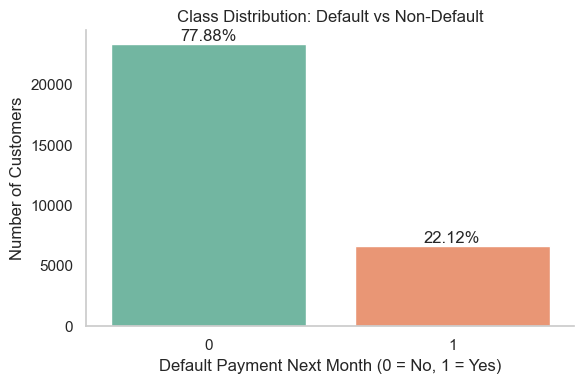

In [9]:
sns.set(style="whitegrid")
plt.figure(figsize=(6,4))
ax = sns.countplot(data=df, x='default payment next month', palette='Set2')
plt.title('Class Distribution: Default vs Non-Default')
plt.xlabel('Default Payment Next Month (0 = No, 1 = Yes)')
plt.ylabel('Number of Customers')
sns.despine(top=True, right=True)
plt.grid(False)

total = df.shape[0]
default_counts = df['default payment next month'].value_counts()
for p in ax.patches:
    height = p.get_height()
    percentage = f'{100 * height / total:.2f}%'
    ax.annotate(percentage, (p.get_x() + p.get_width() / 2., height),
                ha='center', va='bottom')

plt.tight_layout()
plt.show()


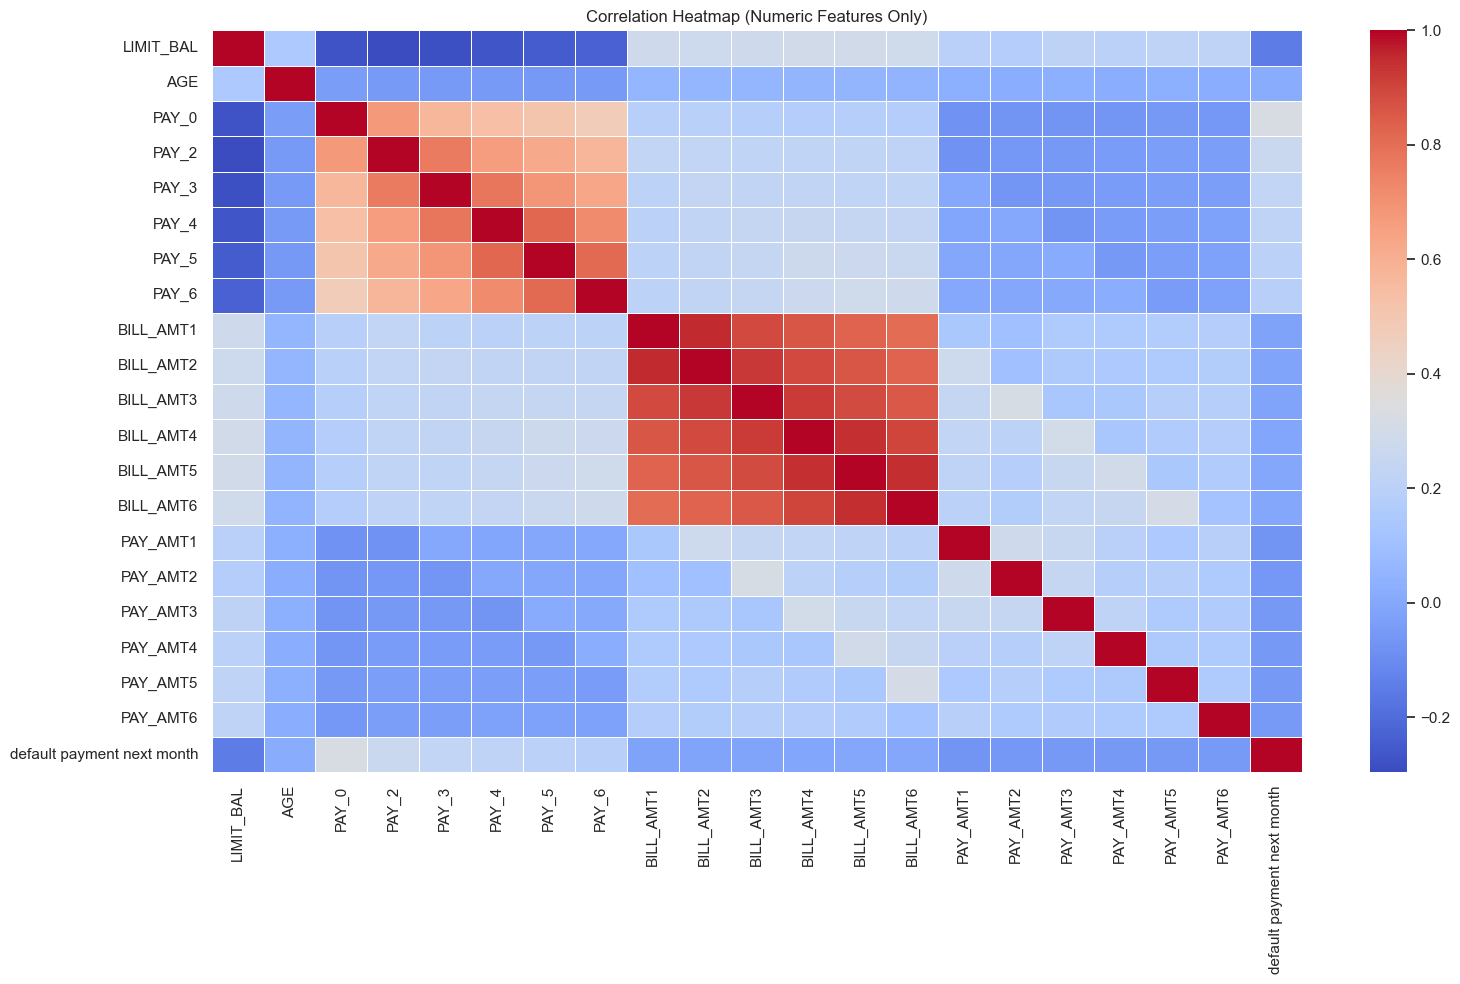

In [6]:
plt.figure(figsize=(16,10))

# Drop categorical columns 
numeric_cols = df.select_dtypes(include=['int64', 'float64']).drop(columns=['ID'])
corr = numeric_cols.corr()

sns.heatmap(corr, cmap='coolwarm', annot=False, fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap (Numeric Features Only)')
plt.tight_layout()
plt.show()


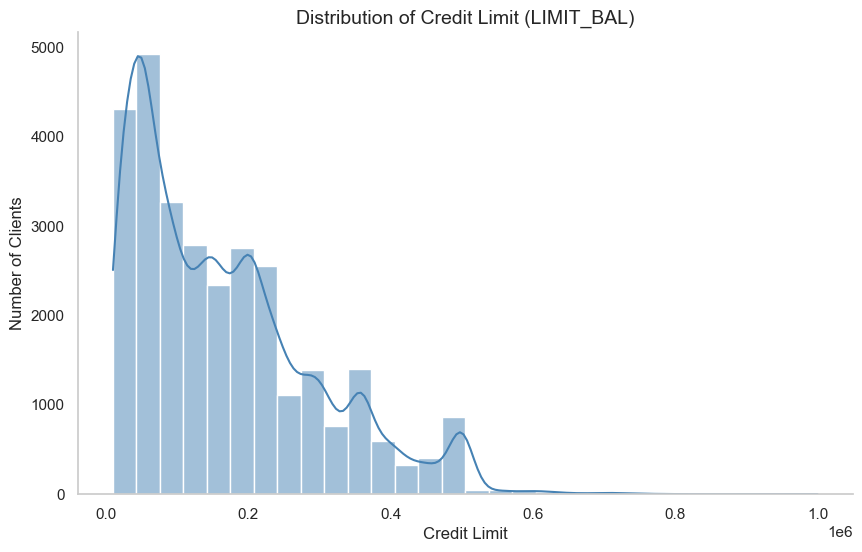

In [7]:
#Distribution of credit limit (LIMIT_BAL)
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.histplot(df['LIMIT_BAL'], bins=30, kde=True, color='steelblue')

plt.title('Distribution of Credit Limit (LIMIT_BAL)', fontsize=14)
plt.xlabel('Credit Limit')
plt.ylabel('Number of Clients')
sns.despine(top=True, right=True)
plt.grid(False)
plt.show()


C:\Users\91934\AppData\Local\Temp\ipykernel_17520\2480997621.py:14: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  default_rates = df.groupby('LIMIT_BUCKET')['default payment next month'].mean().reset_index()
C:\Users\91934\AppData\Local\Temp\ipykernel_17520\2480997621.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=default_rates, x='LIMIT_BUCKET', y='default payment next month', palette='coolwarm')


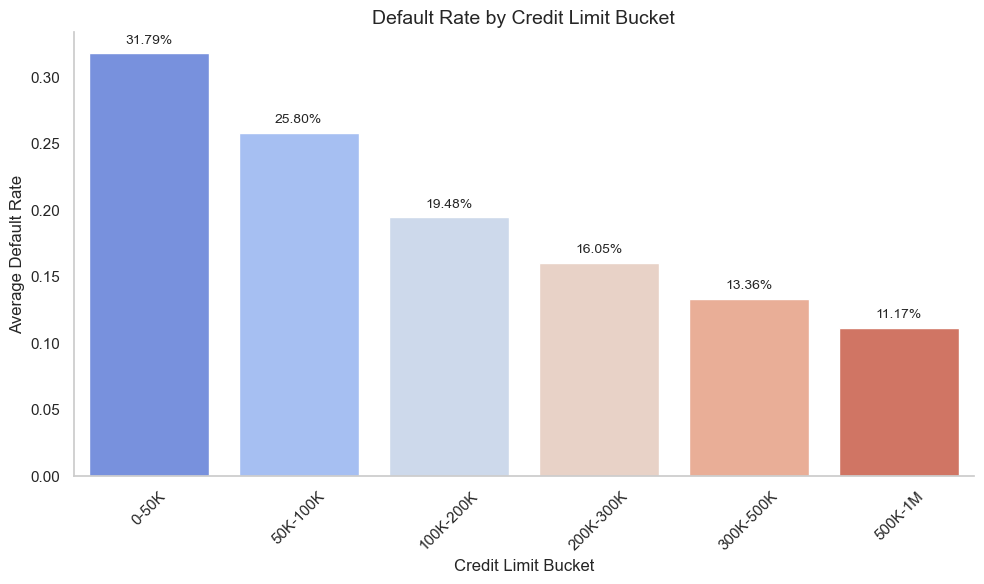

In [8]:
# limit buckets
bins = [0, 50000, 100000, 200000, 300000, 500000, 1000000]
labels = ['0-50K', '50K-100K', '100K-200K', '200K-300K', '300K-500K', '500K-1M']

df['LIMIT_BUCKET'] = pd.cut(df['LIMIT_BAL'], bins=bins, labels=labels)

default_rates = df.groupby('LIMIT_BUCKET')['default payment next month'].mean().reset_index()
plt.figure(figsize=(10, 6))
sns.barplot(data=default_rates, x='LIMIT_BUCKET', y='default payment next month', palette='coolwarm')
plt.title('Default Rate by Credit Limit Bucket', fontsize=14)
plt.xlabel('Credit Limit Bucket')
plt.ylabel('Average Default Rate')
plt.xticks(rotation=45)
plt.grid(False)
sns.despine(top=True, right=True)
for i, val in enumerate(default_rates['default payment next month']):
    plt.text(i, val + 0.005, f"{val:.2%}", ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()


In [9]:
print(df.columns.tolist())


['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'default payment next month', 'LIMIT_BUCKET']


C:\Users\91934\AppData\Local\Temp\ipykernel_17520\755910926.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_default = df.groupby('AGE_BUCKET')['default payment next month'].mean().reset_index()
C:\Users\91934\AppData\Local\Temp\ipykernel_17520\755910926.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=age_default, x='AGE_BUCKET', y='default payment next month', palette='coolwarm')


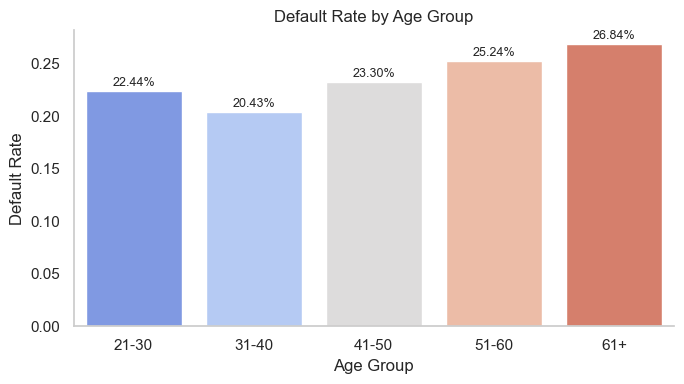

In [10]:
df['AGE_BUCKET'] = pd.cut(df['AGE'], bins=[20, 30, 40, 50, 60, 100], 
                          labels=['21-30', '31-40', '41-50', '51-60', '61+'])
age_default = df.groupby('AGE_BUCKET')['default payment next month'].mean().reset_index()
plt.figure(figsize=(7, 4))
sns.barplot(data=age_default, x='AGE_BUCKET', y='default payment next month', palette='coolwarm')
plt.title('Default Rate by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Default Rate')
plt.grid(False)
sns.despine(top=True, right=True)

for i, val in enumerate(age_default['default payment next month']):
    plt.text(i, val + 0.002, f"{val:.2%}", ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()


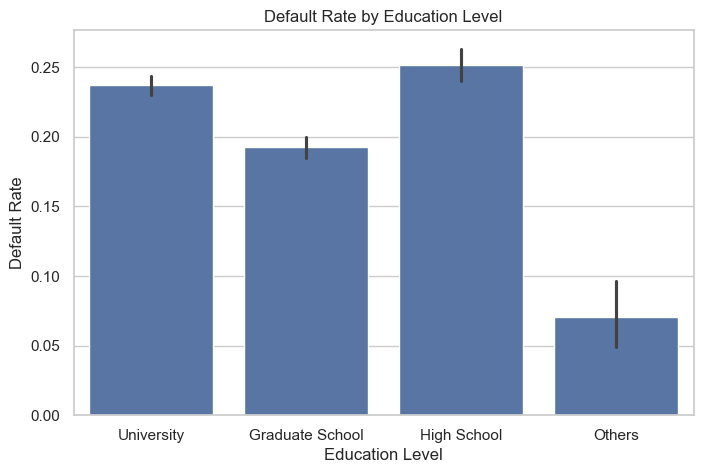

In [11]:
plt.figure(figsize=(8, 5))
sns.barplot(x='EDUCATION', y='default payment next month', data=df)
plt.title('Default Rate by Education Level')
plt.xlabel('Education Level')
plt.ylabel('Default Rate')
plt.show()


In [12]:
df.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month', 'LIMIT_BUCKET', 'AGE_BUCKET'],
      dtype='object')

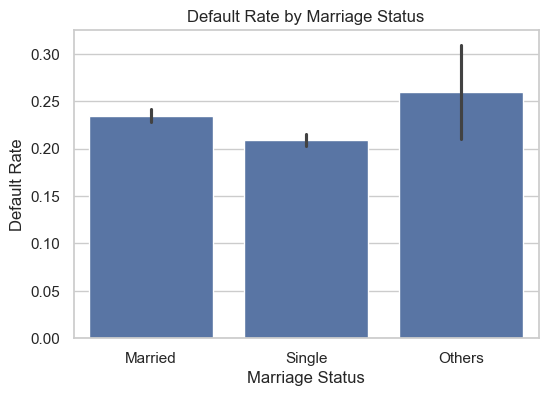

In [13]:
plt.figure(figsize=(6, 4))
sns.barplot(x='MARRIAGE', y='default payment next month', data=df)
plt.title('Default Rate by Marriage Status')
plt.xlabel('Marriage Status')
plt.ylabel('Default Rate')
plt.show()


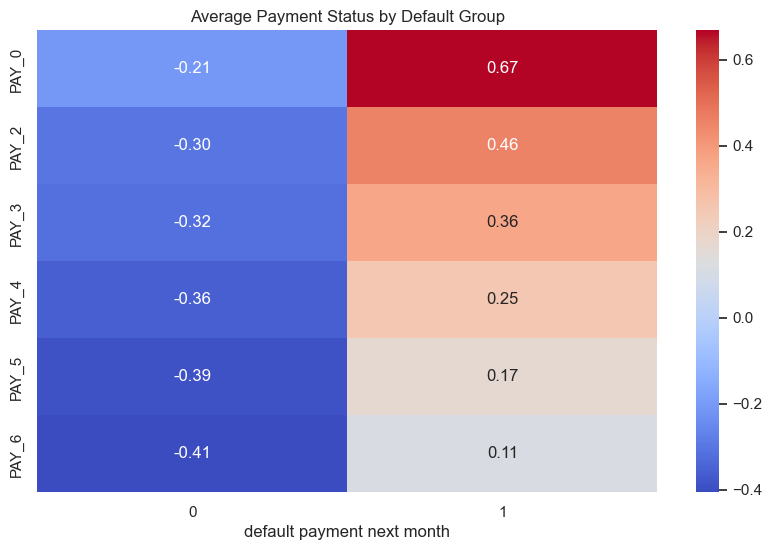

In [14]:
pay_cols = ['PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']
pay_means = df[pay_cols + ['default payment next month']].groupby('default payment next month').mean()

plt.figure(figsize=(10, 6))
sns.heatmap(pay_means.T, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Average Payment Status by Default Group')
plt.show()


default payment next month
0    0.7788
1    0.2212
Name: proportion, dtype: float64


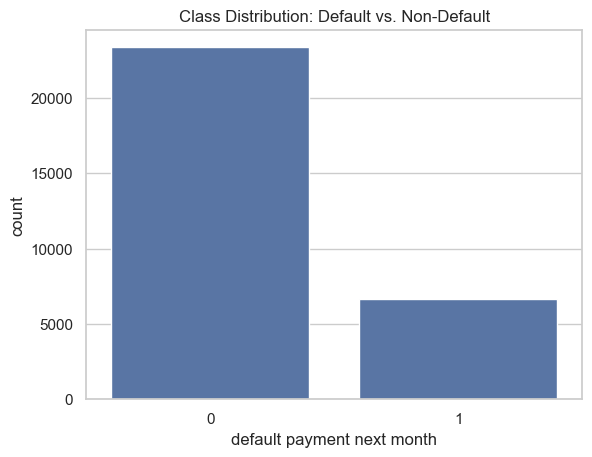

In [17]:
rate = df['default payment next month'].value_counts(normalize=True)
print(rate)
sns.countplot(x='default payment next month', data=df)
plt.title('Class Distribution: Default vs. Non-Default')
plt.show()


In [18]:
age_bins = [20, 30, 40, 50, 60, 80]
age_labels = ['21-30', '31-40', '41-50', '51-60', '61-80']

df['age_bin'] = pd.cut(df['AGE'], bins=age_bins, labels=age_labels, right=False)

limit_bins = [0, 50000, 100000, 200000, 500000, df['LIMIT_BAL'].max()]
limit_labels = ['<50k','50-100k','100-200k','200-500k','>500k']

df['credit_limit_bin'] = pd.cut(df['LIMIT_BAL'], bins=limit_bins, labels=limit_labels, right=False)
risk_group = df[(df['age_bin']=='21-30') & (df['credit_limit_bin']=='<50k')]
default_rate = risk_group['default payment next month'].mean()
print(f"Default rate among Young + Low Credit Limit: {default_rate:.2%}")


Default rate among Young + Low Credit Limit: 34.07%


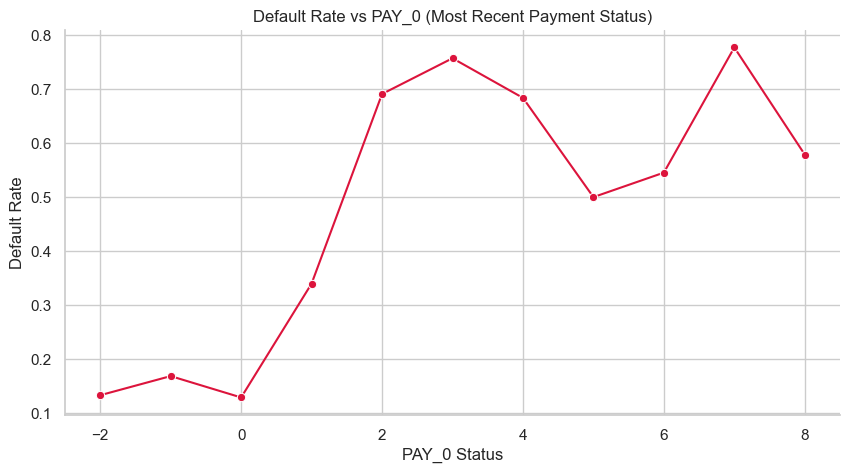

In [19]:
pay0_default = df.groupby('PAY_0')['default payment next month'].mean().reset_index()

plt.figure(figsize=(10, 5))
sns.lineplot(data=pay0_default, x='PAY_0', y='default payment next month', marker='o', color='crimson')
plt.title('Default Rate vs PAY_0 (Most Recent Payment Status)')
plt.xlabel('PAY_0 Status')
plt.ylabel('Default Rate')
plt.grid(True)
sns.despine()
plt.show()


C:\Users\91934\AppData\Local\Temp\ipykernel_17520\50320109.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  heat_data = df.groupby(['LIMIT_BIN'])['BILL_AMT1'].mean().reset_index()
C:\Users\91934\AppData\Local\Temp\ipykernel_17520\50320109.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=heat_data, x='LIMIT_BIN', y='BILL_AMT1', palette='Blues')


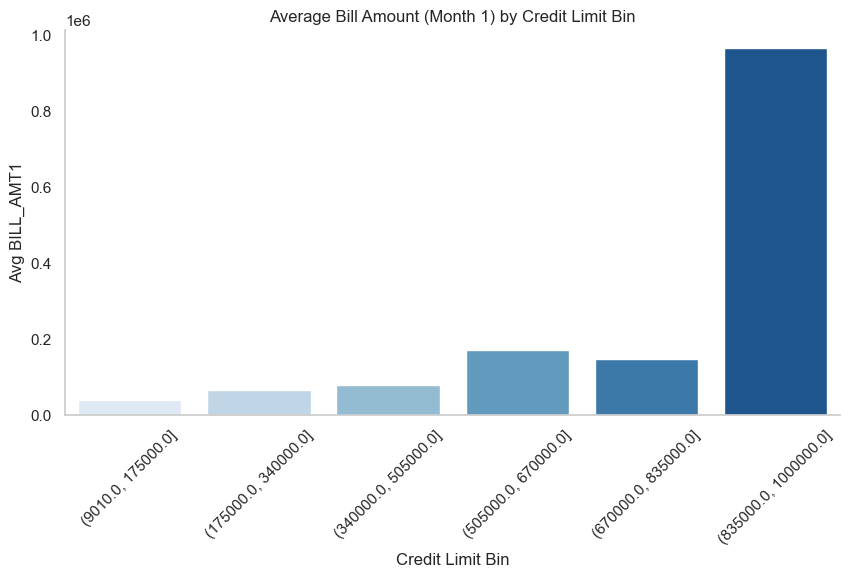

In [20]:
df['LIMIT_BIN'] = pd.cut(df['LIMIT_BAL'], bins=6)
heat_data = df.groupby(['LIMIT_BIN'])['BILL_AMT1'].mean().reset_index()

plt.figure(figsize=(10, 5))
sns.barplot(data=heat_data, x='LIMIT_BIN', y='BILL_AMT1', palette='Blues')
plt.title('Average Bill Amount (Month 1) by Credit Limit Bin')
plt.xlabel('Credit Limit Bin')
plt.ylabel('Avg BILL_AMT1')
plt.xticks(rotation=45)
plt.grid(False)
sns.despine()
plt.show()


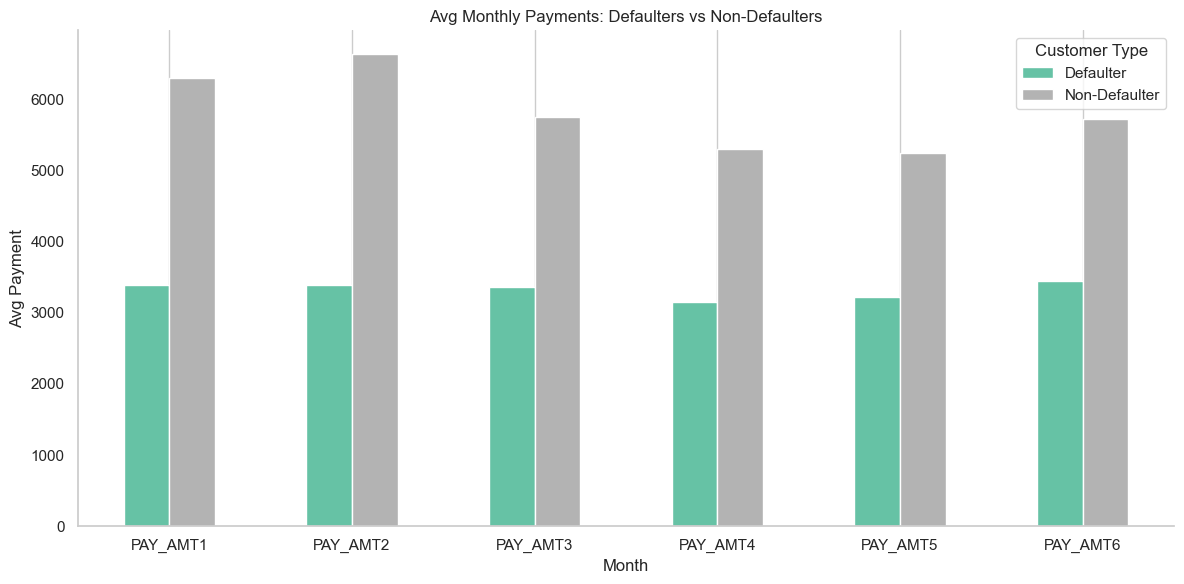

In [21]:
df['Customer Type'] = df['default payment next month'].map({0: 'Non-Defaulter', 1: 'Defaulter'})

pay_cols = ['PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']
avg_payments = df.groupby('Customer Type')[pay_cols].mean().T

avg_payments.plot(kind='bar', figsize=(12, 6), colormap='Set2')
plt.title('Avg Monthly Payments: Defaulters vs Non-Defaulters')
plt.xlabel('Month')
plt.ylabel('Avg Payment')
plt.xticks(rotation=0)
plt.grid(axis='y')
sns.despine()
plt.tight_layout()
plt.show()


In [22]:
df["repayment_ratio"] = df[["PAY_AMT1", "PAY_AMT2", "PAY_AMT3", "PAY_AMT4", "PAY_AMT5", "PAY_AMT6"]].sum(axis=1) / \
                        df[["BILL_AMT1", "BILL_AMT2", "BILL_AMT3", "BILL_AMT4", "BILL_AMT5", "BILL_AMT6"]].sum(axis=1)


<Axes: xlabel='default payment next month', ylabel='repayment_ratio'>

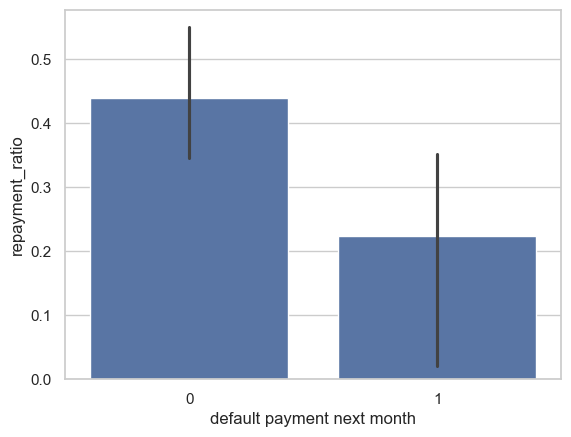

In [23]:
sns.barplot(x='default payment next month', y='repayment_ratio', data=df)


In [24]:
# First, calculate the average bill amount over 6 months
df['AVG_BILL_AMT'] = df[['BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 
                         'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']].mean(axis=1)

# Then, calculate the utilization ratio
df['UTILIZATION_RATIO'] = df['AVG_BILL_AMT'] / df['LIMIT_BAL']


C:\Users\91934\AppData\Local\Temp\ipykernel_17520\1336689725.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  util_default = df.groupby('UTIL_BUCKET')['default payment next month'].mean().reset_index()
C:\Users\91934\AppData\Local\Temp\ipykernel_17520\1336689725.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=util_default, x='UTIL_BUCKET', y='default payment next month', palette='coolwarm')


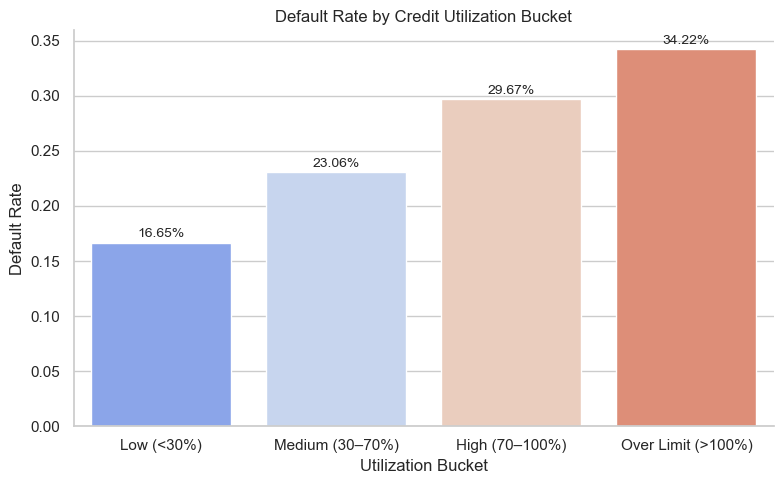

In [25]:
df['UTIL_BUCKET'] = pd.cut(df['UTILIZATION_RATIO'], 
                           bins=[0, 0.3, 0.7, 1.0, np.inf], 
                           labels=['Low (<30%)', 'Medium (30–70%)', 'High (70–100%)', 'Over Limit (>100%)'])

util_default = df.groupby('UTIL_BUCKET')['default payment next month'].mean().reset_index()
plt.figure(figsize=(8,5))
sns.barplot(data=util_default, x='UTIL_BUCKET', y='default payment next month', palette='coolwarm')
plt.title('Default Rate by Credit Utilization Bucket')
plt.xlabel('Utilization Bucket')
plt.ylabel('Default Rate')
sns.despine(top=True, right=True)

for i, val in enumerate(util_default['default payment next month']):
    plt.text(i, val + 0.005, f"{val:.2%}", ha='center', fontsize=10)

plt.tight_layout()
plt.show()


C:\Users\91934\AppData\Local\Temp\ipykernel_17520\3405418725.py:41: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=cluster_default, x='repayment_cluster_label', y='default payment next month', palette='viridis')


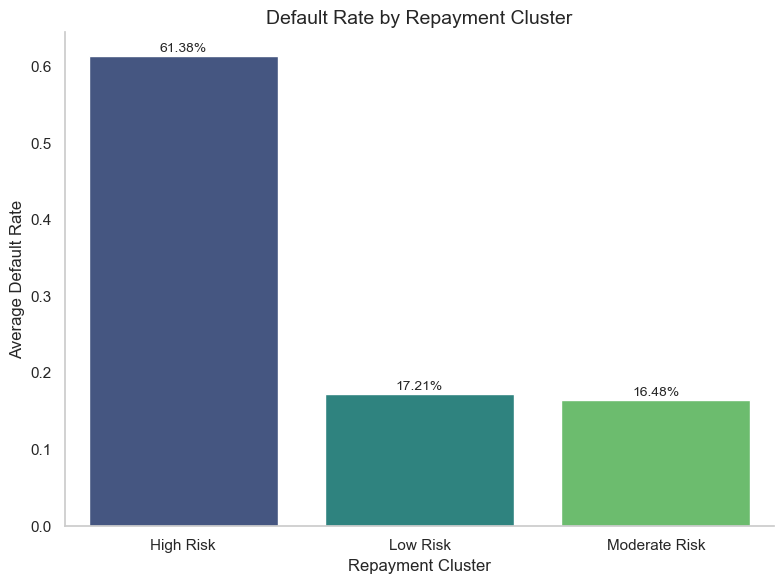

In [26]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

repayment_cols = ['PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']
X = df[repayment_cols]


scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply KMeans clustering
kmeans = KMeans(n_clusters=3, random_state=42)
df['repayment_cluster'] = kmeans.fit_predict(X_scaled)

cluster_map = {
    0: 'Low Risk',
    1: 'Moderate Risk',
    2: 'High Risk'
}
df['repayment_cluster_label'] = df['repayment_cluster'].map(cluster_map)

cluster_default = df.groupby('repayment_cluster_label')['default payment next month'].mean().reset_index()

cluster_default = cluster_default.sort_values(by='default payment next month', ascending=False)

plt.figure(figsize=(8, 6))
sns.barplot(data=cluster_default, x='repayment_cluster_label', y='default payment next month', palette='viridis')

plt.title('Default Rate by Repayment Cluster', fontsize=14)
plt.xlabel('Repayment Cluster')
plt.ylabel('Average Default Rate')
plt.grid(False)
sns.despine(top=True, right=True)

for i, val in enumerate(cluster_default['default payment next month']):
    plt.text(i, val + 0.005, f"{val:.2%}", ha='center', fontsize=10)

plt.tight_layout()
plt.show()


In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 43 columns):
 #   Column                      Non-Null Count  Dtype   
---  ------                      --------------  -----   
 0   ID                          30000 non-null  int64   
 1   LIMIT_BAL                   30000 non-null  int64   
 2   SEX                         30000 non-null  object  
 3   EDUCATION                   30000 non-null  object  
 4   MARRIAGE                    29946 non-null  object  
 5   AGE                         30000 non-null  int64   
 6   PAY_0                       30000 non-null  int64   
 7   PAY_2                       30000 non-null  int64   
 8   PAY_3                       30000 non-null  int64   
 9   PAY_4                       30000 non-null  int64   
 10  PAY_5                       30000 non-null  int64   
 11  PAY_6                       30000 non-null  int64   
 12  BILL_AMT1                   30000 non-null  int64   
 13  BILL_AMT2       

In [11]:
df_feat = df.copy()
df_feat.rename(columns={'default payment next month': 'default_payment'}, inplace=True)
age_bins = [20, 30, 40, 50, 60, 70, 100]
age_labels = ['20s', '30s', '40s', '50s', '60s', '70+']
df_feat['AGE_BINNED'] = pd.cut(df_feat['AGE'], bins=age_bins, labels=age_labels)

# SEX: 1 = male, 2 = female
df_feat['is_male'] = df_feat['SEX'] == 1
df_feat['is_male'] = df_feat['is_male'].astype(int)


# MARRIAGE: 1 = married, 2 = single, 3 = others
df_feat['is_single'] = df_feat['MARRIAGE'] == 2
df_feat['is_single'] = df_feat['is_single'].astype(int)

# Ohe for categorical variables for EDUCATION and MARRIAGE

edu_dummies = pd.get_dummies(df_feat['EDUCATION'], prefix='EDU')
mar_dummies = pd.get_dummies(df_feat['MARRIAGE'], prefix='MAR')

# Combine the dummy variables with the original DataFrame
df_feat = pd.concat([df_feat, edu_dummies, mar_dummies], axis=1)

#  Drop the original columns 
df_feat.drop(columns=['SEX', 'EDUCATION', 'MARRIAGE'], inplace=True)

print("done.")


done.


In [13]:

pay_cols = ['PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']

df_feat['avg_delay'] = df_feat[pay_cols].replace(-2, 0).mean(axis=1)
df_feat['max_delay'] = df_feat[pay_cols].replace(-2, 0).max(axis=1)
df_feat['count_delayed_months'] = df_feat[pay_cols].apply(lambda row: (row > 0).sum(), axis=1)
df_feat['has_severe_delay'] = df_feat[pay_cols].apply(lambda row: (row >= 3).any(), axis=1).astype(int)

bill_cols = ['BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']
pay_amt_cols = ['PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']

df_feat['total_bill'] = df_feat[bill_cols].sum(axis=1)
df_feat['total_paid'] = df_feat[pay_amt_cols].sum(axis=1)


df_feat['repayment_ratio'] = df_feat['total_paid'] / (df_feat['total_bill'] + 1)
print('done')

done


In [15]:
utilization_cols = [col for col in bill_cols]
df_feat['avg_utilization'] = df_feat[utilization_cols].div(df_feat['LIMIT_BAL'], axis=0).mean(axis=1)
df_feat['max_utilization'] = df_feat[utilization_cols].div(df_feat['LIMIT_BAL'], axis=0).max(axis=1)
df_feat['min_utilization'] = df_feat[utilization_cols].div(df_feat['LIMIT_BAL'], axis=0).min(axis=1)

df_feat['utilization_std'] = df_feat[utilization_cols].div(df_feat['LIMIT_BAL'], axis=0).std(axis=1)
df_feat['monthly_payment_ratio'] = df_feat[pay_amt_cols].sum(axis=1) / (df_feat[bill_cols].sum(axis=1) + 1)
df_feat['payment_trend'] = df_feat['PAY_AMT6'] - df_feat['PAY_AMT1']

df_feat['bill_trend'] = df_feat['BILL_AMT6'] - df_feat['BILL_AMT1']
print('done')

done


In [17]:
df_feat.columns

Index(['ID', 'LIMIT_BAL', 'AGE', 'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5',
       'PAY_6', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4',
       'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3',
       'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'default_payment', 'AGE_BINNED',
       'is_male', 'is_single', 'EDU_Graduate School', 'EDU_High School',
       'EDU_Others', 'EDU_University', 'MAR_Married', 'MAR_Others',
       'MAR_Single', 'avg_delay', 'max_delay', 'count_delayed_months',
       'has_severe_delay', 'total_bill', 'total_paid', 'repayment_ratio',
       'avg_utilization', 'max_utilization', 'min_utilization',
       'utilization_std', 'monthly_payment_ratio', 'payment_trend',
       'bill_trend'],
      dtype='object')

In [19]:
df_feat.select_dtypes(include=['object', 'category']).columns.tolist()


['AGE_BINNED']

In [21]:
df_feat.isnull().sum()

ID                       0
LIMIT_BAL                0
AGE                      0
PAY_0                    0
PAY_2                    0
PAY_3                    0
PAY_4                    0
PAY_5                    0
PAY_6                    0
BILL_AMT1                0
BILL_AMT2                0
BILL_AMT3                0
BILL_AMT4                0
BILL_AMT5                0
BILL_AMT6                0
PAY_AMT1                 0
PAY_AMT2                 0
PAY_AMT3                 0
PAY_AMT4                 0
PAY_AMT5                 0
PAY_AMT6                 0
default_payment          0
AGE_BINNED               0
is_male                  0
is_single                0
EDU_Graduate School      0
EDU_High School          0
EDU_Others               0
EDU_University           0
MAR_Married              0
MAR_Others               0
MAR_Single               0
avg_delay                0
max_delay                0
count_delayed_months     0
has_severe_delay         0
total_bill               0
t

In [23]:
drop_cols = [ 'AGE_BINNED'
]

df_feat_cleaned = df_feat.drop(columns=drop_cols)
print('Done')

Done


In [25]:
df_feat_cleaned.shape

(30000, 45)

In [27]:
df_feat_cleaned.columns

Index(['ID', 'LIMIT_BAL', 'AGE', 'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5',
       'PAY_6', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4',
       'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3',
       'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'default_payment', 'is_male',
       'is_single', 'EDU_Graduate School', 'EDU_High School', 'EDU_Others',
       'EDU_University', 'MAR_Married', 'MAR_Others', 'MAR_Single',
       'avg_delay', 'max_delay', 'count_delayed_months', 'has_severe_delay',
       'total_bill', 'total_paid', 'repayment_ratio', 'avg_utilization',
       'max_utilization', 'min_utilization', 'utilization_std',
       'monthly_payment_ratio', 'payment_trend', 'bill_trend'],
      dtype='object')

In [23]:
df_feat.head(5)

,ID,LIMIT_BAL,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,...,total_bill,total_paid,repayment_ratio,avg_utilization,max_utilization,min_utilization,utilization_std,monthly_payment_ratio,payment_trend,bill_trend
0,1,20000,24,2,2,-1,-1,-2,-2,3913,...,7704,689,0.089422,0.064200,0.195650,0.000000,0.088082,0.089422,0,-3913
1,2,120000,26,-1,2,0,0,0,2,2682,...,17077,5000,0.292774,0.023718,0.028792,0.014375,0.005316,0.292774,2000,579
2,3,90000,34,0,0,0,0,0,0,29239,...,101653,11018,0.108387,0.188246,0.324878,0.150656,0.067384,0.108387,3482,-13690
3,4,50000,37,0,0,0,0,0,0,46990,...,231334,8388,0.036259,0.771113,0.985820,0.566280,0.211316,0.036259,-1000,-17443
4,5,50000,57,-1,0,-1,0,0,0,8617,...,109339,59049,0.540049,0.364463,0.716700,0.113400,0.213372,0.540049,-1321,10514


In [29]:
df_feat_cleaned.isnull().sum()

ID                       0
LIMIT_BAL                0
AGE                      0
PAY_0                    0
PAY_2                    0
PAY_3                    0
PAY_4                    0
PAY_5                    0
PAY_6                    0
BILL_AMT1                0
BILL_AMT2                0
BILL_AMT3                0
BILL_AMT4                0
BILL_AMT5                0
BILL_AMT6                0
PAY_AMT1                 0
PAY_AMT2                 0
PAY_AMT3                 0
PAY_AMT4                 0
PAY_AMT5                 0
PAY_AMT6                 0
default_payment          0
is_male                  0
is_single                0
EDU_Graduate School      0
EDU_High School          0
EDU_Others               0
EDU_University           0
MAR_Married              0
MAR_Others               0
MAR_Single               0
avg_delay                0
max_delay                0
count_delayed_months     0
has_severe_delay         0
total_bill               0
total_paid               0
r


Model: Logistic Regression
              precision    recall  f1-score   support

           0       0.83      0.95      0.89      4673
           1       0.64      0.30      0.41      1327

    accuracy                           0.81      6000
   macro avg       0.73      0.63      0.65      6000
weighted avg       0.79      0.81      0.78      6000

ROC AUC Score: 0.748204221496577

Model: Decision Tree
              precision    recall  f1-score   support

           0       0.83      0.82      0.82      4673
           1       0.39      0.40      0.39      1327

    accuracy                           0.73      6000
   macro avg       0.61      0.61      0.61      6000
weighted avg       0.73      0.73      0.73      6000

ROC AUC Score: 0.6123860700837002

Model: Random Forest
              precision    recall  f1-score   support

           0       0.84      0.94      0.89      4673
           1       0.63      0.36      0.46      1327

    accuracy                           0.81

F:\PYTHON MSE\Lib\site-packages\xgboost\training.py:183: UserWarning: [13:42:31] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)



Model: XGBoost
              precision    recall  f1-score   support

           0       0.84      0.93      0.88      4673
           1       0.61      0.37      0.46      1327

    accuracy                           0.81      6000
   macro avg       0.73      0.65      0.67      6000
weighted avg       0.79      0.81      0.79      6000

ROC AUC Score: 0.7595358930739544


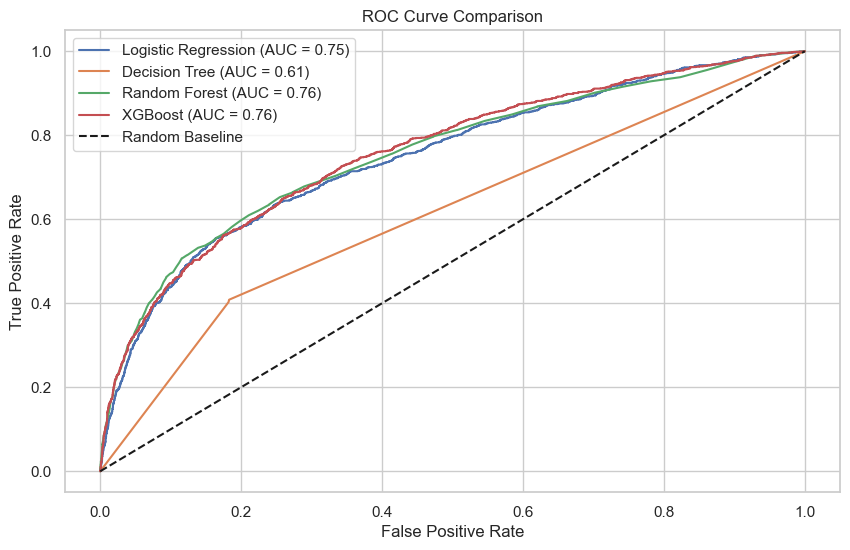

In [31]:

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
import matplotlib.pyplot as plt
import seaborn as sns

X = df_feat_cleaned.drop(columns=['default_payment', 'ID'], errors='ignore')
y = df_feat_cleaned['default_payment']


X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)


scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
}

# Train the model
results = {}

for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    y_proba = model.predict_proba(X_test_scaled)[:, 1]

    print(f"\nModel: {name}")
    print(classification_report(y_test, y_pred))
    print("ROC AUC Score:", roc_auc_score(y_test, y_proba))
    results[name] = roc_auc_score(y_test, y_proba)

# ROC comparison
plt.figure(figsize=(10, 6))
for name, model in models.items():
    y_proba = model.predict_proba(X_test_scaled)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_proba)
    plt.plot(fpr, tpr, label=f"{name} (AUC = {results[name]:.2f})")

plt.plot([0, 1], [0, 1], 'k--', label='Random Baseline')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve Comparison")
plt.legend()
plt.grid(True)
plt.show()


In [33]:
import lightgbm as lgb
import optuna
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import roc_auc_score


X = df_feat_cleaned.drop(columns=['default_payment', 'ID'], errors='ignore')
y = df_feat_cleaned['default_payment']


scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


def objective(trial):
    param = {
        "objective": "binary",
        "metric": "auc",
        "verbosity": -1,
        "boosting_type": "gbdt",
        "feature_pre_filter": False,
        "lambda_l1": trial.suggest_float("lambda_l1", 1e-8, 10.0, log=True),
        "lambda_l2": trial.suggest_float("lambda_l2", 1e-8, 10.0, log=True),
        "num_leaves": trial.suggest_int("num_leaves", 16, 256),
        "feature_fraction": trial.suggest_float("feature_fraction", 0.4, 1.0),
        "bagging_fraction": trial.suggest_float("bagging_fraction", 0.4, 1.0),
        "bagging_freq": trial.suggest_int("bagging_freq", 1, 10),
        "min_child_samples": trial.suggest_int("min_child_samples", 5, 100),
    }

    
    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    aucs = []
    for train_idx, val_idx in cv.split(X_scaled, y):
        X_train, X_val = X_scaled[train_idx], X_scaled[val_idx]
        y_train, y_val = y.iloc[train_idx], y.iloc[val_idx]

        lgb_train = lgb.Dataset(X_train, y_train)
        lgb_val = lgb.Dataset(X_val, y_val, reference=lgb_train)

        model = lgb.train(
            param,
            lgb_train,
            valid_sets=[lgb_train, lgb_val],
            callbacks=[
        lgb.early_stopping(stopping_rounds=50, verbose=False),
        lgb.log_evaluation(0)] # Suppress logs
        )

        y_pred = model.predict(X_val)
        auc = roc_auc_score(y_val, y_pred)
        aucs.append(auc)

    return np.mean(aucs)
study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=50)

print("Best AUC:", study.best_value)
print("Best Parameters:", study.best_params)


[I 2025-07-25 13:42:47,184] A new study created in memory with name: no-name-19299d91-42e6-425b-b11e-a004e041baee
[I 2025-07-25 13:42:50,479] Trial 0 finished with value: 0.7831759573970667 and parameters: {'lambda_l1': 6.165300522698296e-05, 'lambda_l2': 6.666912089715536e-06, 'num_leaves': 91, 'feature_fraction': 0.49134053101874553, 'bagging_fraction': 0.8660949235644346, 'bagging_freq': 6, 'min_child_samples': 27}. Best is trial 0 with value: 0.7831759573970667.
[I 2025-07-25 13:42:56,298] Trial 1 finished with value: 0.7802920740563917 and parameters: {'lambda_l1': 7.1659263775821434e-06, 'lambda_l2': 4.6390634146083795e-06, 'num_leaves': 183, 'feature_fraction': 0.9831144704782058, 'bagging_fraction': 0.8040604926490802, 'bagging_freq': 4, 'min_child_samples': 70}. Best is trial 0 with value: 0.7831759573970667.
[I 2025-07-25 13:43:00,483] Trial 2 finished with value: 0.7818427711988175 and parameters: {'lambda_l1': 1.1729397090606818e-06, 'lambda_l2': 0.004633977208371654, 'num_

Best AUC: 0.7877194750563385
Best Parameters: {'lambda_l1': 4.004810792472621, 'lambda_l2': 1.1687299221768542e-06, 'num_leaves': 23, 'feature_fraction': 0.5570264277401803, 'bagging_fraction': 0.9957902034088343, 'bagging_freq': 8, 'min_child_samples': 97}


In [35]:
best_params = {
    'objective': 'binary',
    'metric': 'auc',
    'verbosity': -1,
    'boosting_type': 'gbdt',
    'is_unbalance': True,
    'lambda_l1': 2.0001622363004707,
    'lambda_l2': 2.340817685465314,
    'num_leaves': 96,
    'feature_fraction': 0.717041700086918,
    'bagging_fraction': 0.7292882630418426,
    'bagging_freq': 2,
    'min_child_samples': 96,
    'learning_rate': 0.02349363737753449,
    'max_depth': 4,
    'n_estimators': 1000  # can increase to 2000 if needed
}

final_model = lgb.LGBMClassifier(**best_params)

final_model.fit(
    X_train, y_train,
    eval_set=[(X_train, y_train)],
    eval_metric='auc',
    callbacks=[lgb.early_stopping(50), lgb.log_evaluation(50)]
)


F:\PYTHON MSE\Lib\site-packages\lightgbm\callback.py:347: UserWarning: Only training set found, disabling early stopping.
  _log_warning("Only training set found, disabling early stopping.")


[50]	training's auc: 0.794797
[100]	training's auc: 0.798991
[150]	training's auc: 0.803321
[200]	training's auc: 0.807872
[250]	training's auc: 0.812167
[300]	training's auc: 0.81628
[350]	training's auc: 0.820149
[400]	training's auc: 0.823898
[450]	training's auc: 0.827066
[500]	training's auc: 0.830177
[550]	training's auc: 0.833209
[600]	training's auc: 0.836579
[650]	training's auc: 0.839176
[700]	training's auc: 0.842151
[750]	training's auc: 0.844657
[800]	training's auc: 0.847374
[850]	training's auc: 0.850036
[900]	training's auc: 0.852417
[950]	training's auc: 0.855139
[1000]	training's auc: 0.857721


LGBMClassifier(bagging_fraction=0.7292882630418426, bagging_freq=2,
               feature_fraction=0.717041700086918, is_unbalance=True,
               lambda_l1=2.0001622363004707, lambda_l2=2.340817685465314,
               learning_rate=0.02349363737753449, max_depth=4, metric='auc',
               min_child_samples=96, n_estimators=1000, num_leaves=96,
               objective='binary', verbosity=-1)

In [37]:

y_pred_proba = final_model.predict_proba(X_test)[:, 1]
y_pred = final_model.predict(X_test)

from sklearn.metrics import roc_auc_score, classification_report

print("🚀 Test AUC:", roc_auc_score(y_test, y_pred_proba))
print(classification_report(y_test, y_pred))


🚀 Test AUC: 0.7779656127143197
              precision    recall  f1-score   support

           0       0.88      0.78      0.83      4673
           1       0.46      0.64      0.53      1327

    accuracy                           0.75      6000
   macro avg       0.67      0.71      0.68      6000
weighted avg       0.79      0.75      0.76      6000



In [39]:

best_params = study.best_params
best_params.update({
    "objective": "binary",
    "metric": "auc",
    "verbosity": -1,
    "boosting_type": "gbdt"
})

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, stratify=y, random_state=42)
lgb_train = lgb.Dataset(X_train, y_train)
lgb_test = lgb.Dataset(X_test, y_test, reference=lgb_train)

final_model = final_model = lgb.train(
    best_params,
    lgb_train,
    valid_sets=[lgb_test],
    callbacks=[
        lgb.early_stopping(stopping_rounds=50),
        lgb.log_evaluation(10)
    ]
)
# Prediction
y_pred = final_model.predict(X_test)
print("Final ROC AUC Score:", roc_auc_score(y_test, y_pred))


Training until validation scores don't improve for 50 rounds
[10]	valid_0's auc: 0.776648
[20]	valid_0's auc: 0.778862
[30]	valid_0's auc: 0.779697
[40]	valid_0's auc: 0.779727
[50]	valid_0's auc: 0.77983
[60]	valid_0's auc: 0.779598
[70]	valid_0's auc: 0.779283
[80]	valid_0's auc: 0.778837
[90]	valid_0's auc: 0.778646
Early stopping, best iteration is:
[42]	valid_0's auc: 0.77993
Final ROC AUC Score: 0.779929870178877


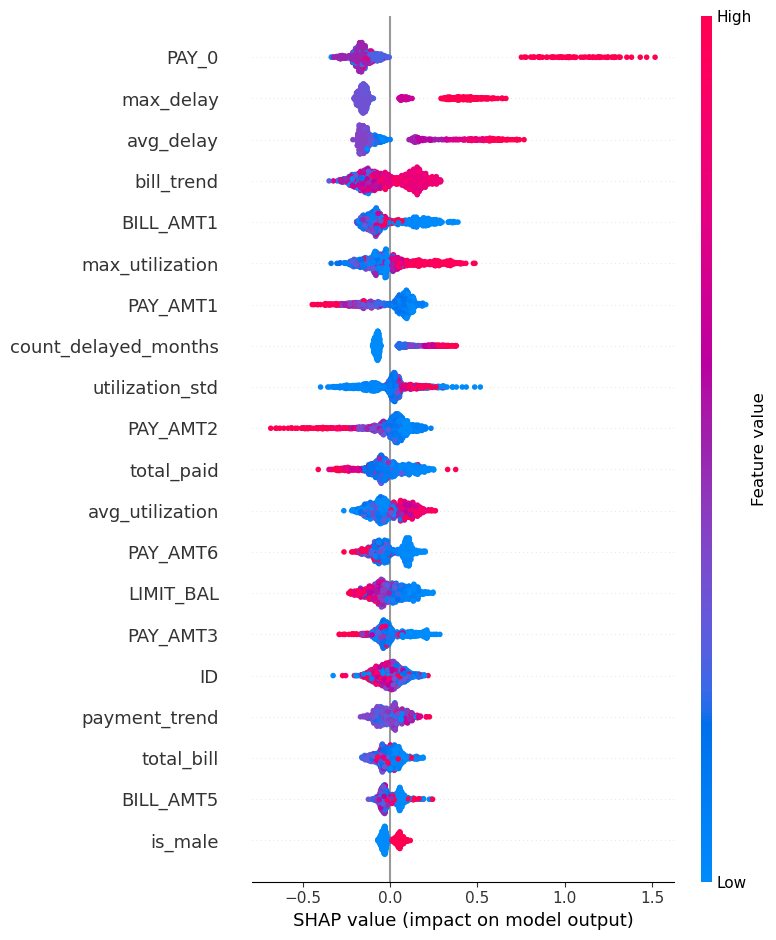

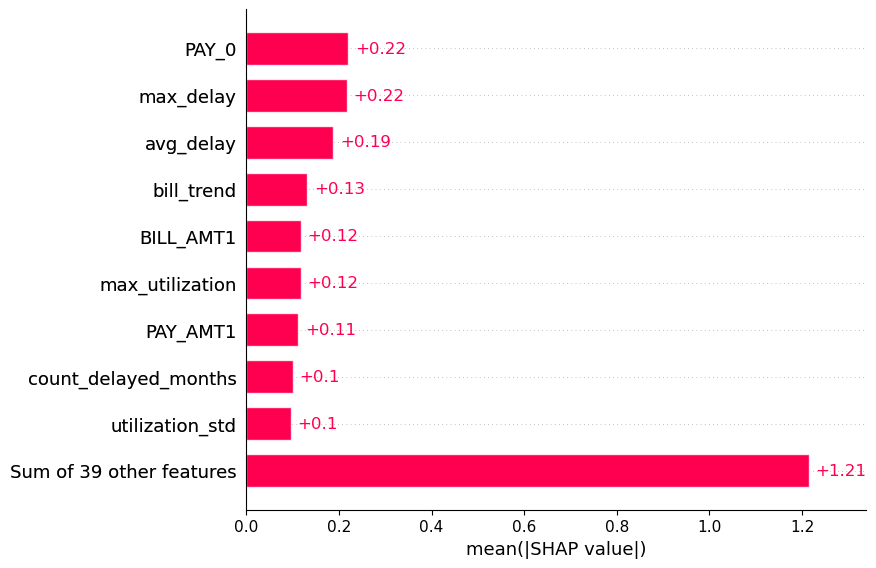

In [43]:
import shap
import matplotlib.pyplot as plt
explainer = shap.Explainer(final_model)

sample_data = X_train.sample(1000, random_state=42)

shap_values = explainer(sample_data)

shap.summary_plot(shap_values, sample_data)

shap.plots.bar(shap_values)




In [5]:
import plotly.express as px
import plotly.graph_objs as go
from dash import Dash, dcc, html, Input, Output, dash_table
import dash_bootstrap_components as dbc


app = Dash(__name__, external_stylesheets=[dbc.themes.LUX])


df = pd.read_excel("default of credit card clients.xlsx", header=1)

df['SEX'] = df['SEX'].map({1: 'Male', 2: 'Female'})
df['MARRIAGE'] = df['MARRIAGE'].map({1: 'Married', 2: 'Single', 3: 'Others'})
df['EDUCATION'] = df['EDUCATION'].replace({0: 'Unknown', 5: 'Unknown', 6: 'Unknown'})
df['EDUCATION'] = df['EDUCATION'].map({
    1: 'Graduate School', 2: 'University', 3: 'High School', 4: 'Others', 'Unknown': 'Others'
})

df['default_payment'] = df['default payment next month']

app.layout = dbc.Container([
    dbc.Row([
        dbc.Col(html.H2("Credit Card Delinquency Dashboard", className="text-center mb-4"), width=12)
    ]),
    dbc.Row([
        dbc.Col(dcc.Dropdown(
            id='feature_dropdown',
            options=[{'label': col, 'value': col} for col in ['SEX', 'AGE', 'EDUCATION', 'MARRIAGE', 'default_payment']],
            value='SEX',
            clearable=False
        ), width=4)
    ]),
    dbc.Row([
        dbc.Col(dcc.Graph(id='bar_plot'), width=6),
        dbc.Col(
            dcc.Graph(id='hist_plot'),
            width=6,
            id='hist_plot_col',
            style={}  # This will be updated by callback
        )
    ]),
    dbc.Row([
        dbc.Col([
            html.H5("Sample Data"),
            dash_table.DataTable(
                id='data_table',
                columns=[{"name": i, "id": i} for i in df.head().columns],
                data=df.head().to_dict('records'),
                page_size=5
            )
        ])
    ]),
    dbc.Row([
        dbc.Col(html.Div(id='summary_stats'))
    ])
])

@app.callback(
    Output('bar_plot', 'figure'),
    Output('hist_plot', 'figure'),
    Output('hist_plot_col', 'style'),
    Output('summary_stats', 'children'),
    Input('feature_dropdown', 'value')
)
def update_charts(feature):
    bar_fig = px.histogram(df, x=feature, color='default_payment', barmode='group')
   
    if pd.api.types.is_numeric_dtype(df[feature]) and feature != 'default_payment':
        hist_fig = px.box(df, x='default_payment', y=feature)
        style = {} 
    else:
        hist_fig = {}
        style = {"display": "none"}  # Hide plot
    summary = df[feature].value_counts().to_frame().reset_index()
    stats = html.Div([
        html.H6("Value Counts"),
        dash_table.DataTable(
            columns=[{"name": i, "id": i} for i in summary.columns],
            data=summary.to_dict('records'),
            page_size=5
        )
    ])
    return bar_fig, hist_fig, style, stats

if __name__ == '__main__':
    app.run(debug=True)
